# Project 1 - Coyote or Dog? 

Team members: Tim, JiaJun, and Maria

# Data Section



First, we chose to download sample datasets from canvas. We wanted to make sure that our datasets had the same amount for both dogs and coyotes so we chose to use 900 images of both dogs and coyotes. We chose to use 20% of the dataset for validation and 80% to train the dataset for the model.

Step 1: Get the data from the GitHub zip file and unzip it.

In [2]:
!wget https://github.com/TimnLyt/data-practicum/raw/jjh_test/dogs_coyotes.zip

--2022-04-21 03:37:34--  https://github.com/TimnLyt/data-practicum/raw/jjh_test/dogs_coyotes.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/TimnLyt/data-practicum/jjh_test/dogs_coyotes.zip [following]
--2022-04-21 03:37:35--  https://raw.githubusercontent.com/TimnLyt/data-practicum/jjh_test/dogs_coyotes.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 88105210 (84M) [application/zip]
Saving to: ‘dogs_coyotes.zip’

dogs_coyotes.zip    100%[===================>]  84.02M   224MB/s    in 0.4s    

2022-04-21 03:37:36 (224 MB/s) - ‘dogs_coyotes.zip’ saved [88105210/88105210]



In [ ]:
!unzip /content/dogs_coyotes.zip



Step 2: set up directory to the test and train data.

In [4]:
import os

data_dir = '/content/dogs_coyotes'
train_dir = os.path.join(data_dir, "train")
test_dir = os.path.join(data_dir, "test")

print(os.listdir(data_dir))
print(train_dir)
print(test_dir)

classes = os.listdir(data_dir + "/train")
print(classes)

['train', 'test']
/content/dogs_coyotes/train
/content/dogs_coyotes/test
['dogs', 'coyotes']


# Data Exploration

We decided to print the first 15 file names in each dataset from both the training and validation directories. In this way we can know for sure that the files are in their correct location. We then counted the total number of files in both of these directories to make sure they were all there. For the last step, we made sure to display a 5x4 grid of random sample photos of both dogs and coyotes.

Step 3: A list of the first 15 file names printed in the datasets inside the training directory.

In [5]:
dog_train = os.listdir(data_dir + "/train/dogs")
dog_train_path = os.path.join(train_dir, "dogs")
coyote_train = os.listdir(data_dir + "/train/coyotes")
coyote_train_path = os.path.join(train_dir, "coyotes")
print(dog_train[:15])
print(coyote_train[:15])

['dog.545.jpg', 'dog.408.jpg', 'dog.235.jpg', 'dog.858.jpg', 'dog.565.jpg', 'dog.369.jpg', 'dog.789.jpg', 'dog.849.jpg', 'dog.531.jpg', 'dog.815.jpg', 'dog.951.jpg', 'dog.575.jpg', 'dog.222.jpg', 'dog.935.jpg', 'dog.502.jpg']
['image92.jpg', 'image1383.jpg', 'image203.jpg', 'image1099.jpg', 'image179.jpg', 'image613.jpg', 'image1322.jpg', 'image1436.jpg', 'image435.jpg', 'image723.jpg', 'image1083.jpg', 'image729.jpg', 'image552.jpg', 'image96.jpg', 'image248.jpg']


Step 4: A list of the first 15 file names printed in the datasets inside the validation directory

In [6]:
dog_test = os.listdir(data_dir + "/test/dogs")
dog_test_path = os.path.join(test_dir, "dogs")
coyote_test = os.listdir(data_dir + "/test/coyotes")
coyote_test_path = os.path.join(test_dir, "coyotes")
print(dog_test[:15])
print(coyote_test[:15])

['dog.674.jpg', 'dog.2100.jpg', 'dog.652.jpg', 'dog.903.jpg', 'dog.675.jpg', 'dog.2125.jpg', 'dog.906.jpg', 'dog.819.jpg', 'dog.988.jpg', 'dog.883.jpg', 'dog.2184.jpg', 'dog.2162.jpg', 'dog.2188.jpg', 'dog.2138.jpg', 'dog.735.jpg']
['image718.jpg', 'image1583.jpg', 'image204.jpg', 'image1515.jpg', 'image759.jpg', 'image1504.jpg', 'image1200.jpg', 'image282.jpg', 'image1476.jpg', 'image1534.jpg', 'image1523.jpg', 'image1134.jpg', 'image1570.jpg', 'image509.jpg', 'image1497.jpg']


Step 5: Both the validation and training directories counted to see the number of files in each dataset.

In [7]:
print('# of training data for dogs:', len(dog_train))
print('# of training data for coyotes:', len(coyote_train))
print('# of testing data for dogs:', len(dog_test))
print('# of testing data for coyotes:', len(coyote_test))

# of training data for dogs: 720
# of training data for coyotes: 720
# of testing data for dogs: 180
# of testing data for coyotes: 180


Step 6: Display images example with labels in training dataset

Label:  coyotes (0)


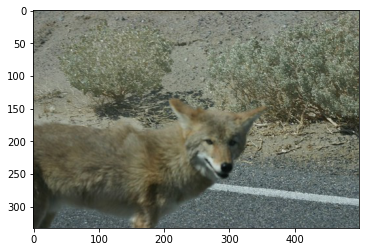

In [8]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

matplotlib.rcParams['figure.facecolor'] = '#ffffff'

dataset = ImageFolder(data_dir+'/train', transform=ToTensor())

def show_example(img, label):
    print('Label: ', dataset.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))

show_example(*dataset[115])

Label:  dogs (1)


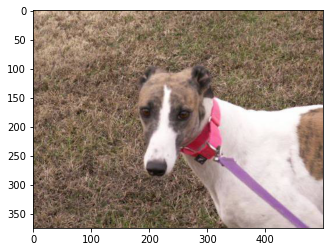

In [9]:
show_example(*dataset[1000])

Step 7: This section should display 10 photos of coyotes and 10 photos of dogs. (Random photos each time it's run) 

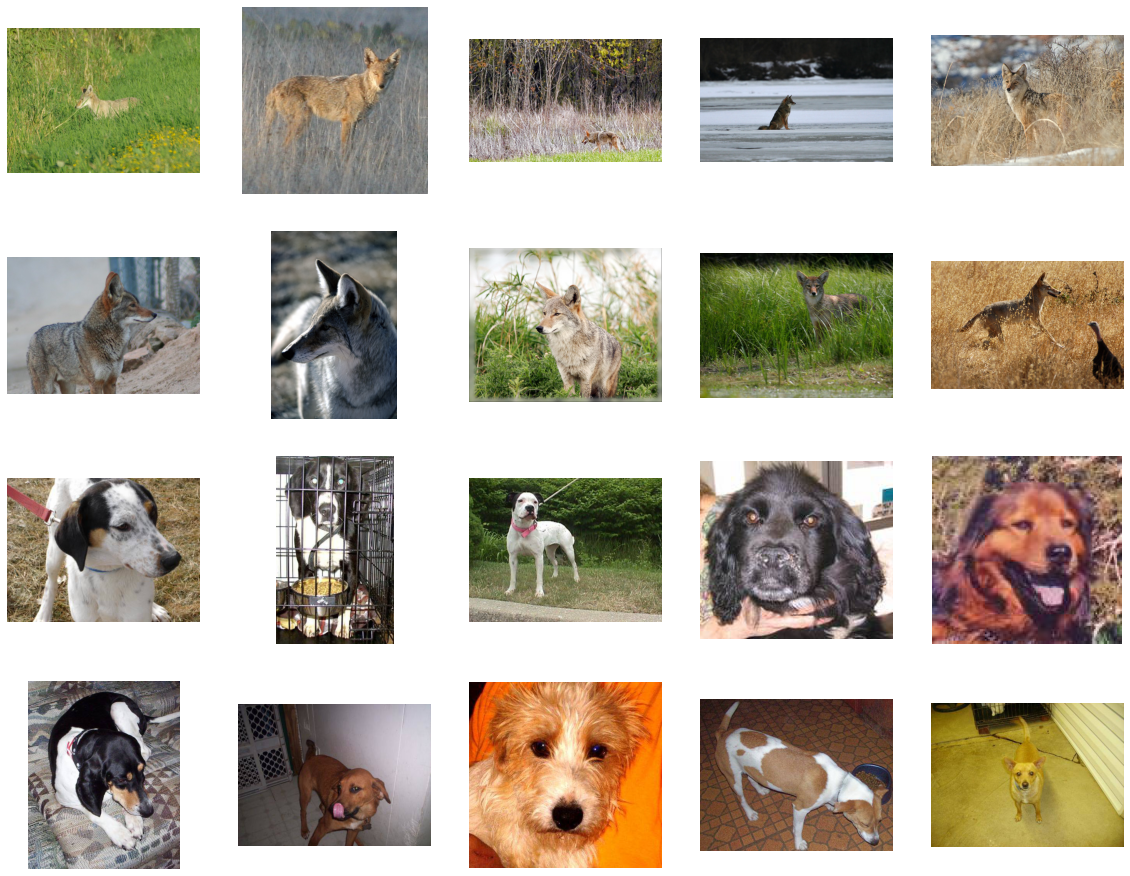

In [11]:
import random

random.shuffle(dog_train)
random.shuffle(coyote_train)
# Parameters for our graph; we'll output images in a 4x5 configuration
nrows = 5
ncols = 5

# Set up matplotlib fig, and size it to fit 4x5 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

# Index for iterating over images
pic_index = 10

next_dog_pix = [os.path.join(dog_train_path, fname) 
                for fname in dog_train[pic_index-10:pic_index]]
next_coyote_pix = [os.path.join(coyote_train_path, fname) 
                for fname in coyote_train[pic_index-10:pic_index]]

for i, img_path in enumerate(next_coyote_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# Creating CNN Model

In [12]:
from tensorflow.keras import layers, Model

In [13]:
# Use Input to shape the map to 150 X 150 pixels, with three color channels (RGB)
img_input = layers.Input(shape=(150, 150, 3))


# The convolution extracts 16 filters that are 3x3. 
# Then followed by max-pooling layer with 2x2 window
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# The 2nd convolution extracts 32 filters
# Then followed by max-pooling layer with 2x2 window
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# The 3rd convolution extracts 64 filters
# Then followed by max-pooling layer with 2x2 window
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# The Flatten feature map to 1-dim tensor to add fully connected layers
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

# Reduced the size of output by adding dropout to reduce overfitting 
x = layers.Dropout(0.2)(x)

# Outputs for the model
output = layers.Dense(1, activation='sigmoid')(x)

# Make Model
model = Model(img_input, output)

## Model Summary

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496 

In [15]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


## Add Data Augmentation to the Preprocessing Step

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        class_mode='binary')

Found 1440 images belonging to 2 classes.
Found 360 images belonging to 2 classes.


# Training the Model

In [17]:
# set the batches of 32
batch_size = 32

# calculate the steps_per_epoch and validation_steps
steps_per_epoch = train_generator.samples//batch_size
validation_steps = validation_generator.samples//batch_size

history = model.fit(
      train_generator,
      steps_per_epoch=steps_per_epoch, 
      epochs=3,
      validation_data=validation_generator,
      validation_steps=validation_steps, 
      verbose=2)

Epoch 1/3
45/45 - 42s - loss: 1.3410 - acc: 0.5618 - val_loss: 0.6444 - val_acc: 0.7131 - 42s/epoch - 937ms/step
Epoch 2/3
45/45 - 38s - loss: 0.6985 - acc: 0.5938 - val_loss: 0.6584 - val_acc: 0.6193 - 38s/epoch - 846ms/step
Epoch 3/3
45/45 - 38s - loss: 0.6621 - acc: 0.6764 - val_loss: 0.5312 - val_acc: 0.7472 - 38s/epoch - 854ms/step


# Reduce Overfitting

Regularization forces the neural network to become simpler. It optimizes the model by penalizing complex models, thereby minimizing loss and complexity.In the case, l2 regularizer, which is the most comment one, is applied on a Dense fully connected layer.
Another popular strategy for fighting overfitting is to use dropout, and we already add it when we create the model. (In here, we change 0.2 to 0.5.)

In [18]:
from keras.regularizers import l2

img_input = layers.Input(shape=(150, 150, 3))

x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Convolution2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Flatten()(x)

x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

x = layers.Dense(32, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))(x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(1, activation='sigmoid')(x)

# Configure and compile the model
model = Model(img_input, output)
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


## Retrain the Model

In [24]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=steps_per_epoch,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=validation_steps,
      verbose=2)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


45/45 - 39s - loss: 0.9396 - acc: 0.6417 - val_loss: 0.9033 - val_acc: 0.5142 - 39s/epoch - 861ms/step
Epoch 2/5
45/45 - 39s - loss: 0.7429 - acc: 0.6938 - val_loss: 0.6350 - val_acc: 0.7386 - 39s/epoch - 867ms/step
Epoch 3/5
45/45 - 39s - loss: 0.6469 - acc: 0.7396 - val_loss: 0.6441 - val_acc: 0.6761 - 39s/epoch - 862ms/step
Epoch 4/5
45/45 - 38s - loss: 0.5699 - acc: 0.7674 - val_loss: 0.5732 - val_acc: 0.7330 - 38s/epoch - 841ms/step
Epoch 5/5
45/45 - 39s - loss: 0.4882 - acc: 0.7861 - val_loss: 0.5210 - val_acc: 0.7727 - 39s/epoch - 875ms/step


## Evaluate the Results

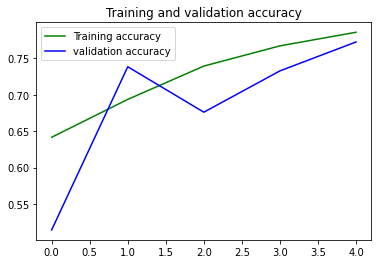

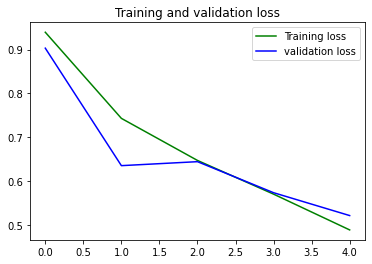

In [28]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, 'g', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label='validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('Training and validation loss')
plt.legend()